# COVID-19 DATA ANALYSIS

---

#### 3 MAIN STEPS:
#### DATA PREPROCESSING: DROP USELESS COLUMNS, DATA AGGREGATION, JOINNING DATASET
#### EXPLORATORY ANALYSIS: FIND MEASURE OF SPEAD OF VIRUS, RELATIONSHIP BETWEEN THE INFECTION RATE AND FACTORS OF HAPPINESS
#### VISUALIZATION BY REGRESSION PLOT

### IMPORT IMPORTANT MODULES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## DATASET: NUMBER OF CASES
---

#### IMPORT COVID 19 DATASET

In [104]:
# This dataset contain the daily report of covid 19 victims from 22-1 to 30-4 in 2020
covid_dataset= pd.read_csv("C:/Users/Win 10/Downloads/covid19_Confirmed_dataset.csv")
covid_dataset.head(10)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27
5,NaN,Antigua and Barbuda,17.0608,-61.7964,0,0,0,0,0,0,...,23,24,24,24,24,24,24,24,24,24
6,NaN,Argentina,-38.4161,-63.6167,0,0,0,0,0,0,...,3031,3144,3435,3607,3780,3892,4003,4127,4285,4428
7,NaN,Armenia,40.0691,45.0382,0,0,0,0,0,0,...,1401,1473,1523,1596,1677,1746,1808,1867,1932,2066
8,Australian Capital Territory,Australia,-35.4735,149.0124,0,0,0,0,0,0,...,104,104,104,105,106,106,106,106,106,106
9,New South Wales,Australia,-33.8688,151.2093,0,0,0,0,3,4,...,2969,2971,2976,2982,2994,3002,3004,3016,3016,3025


In [67]:
# The shape of the dataset
covid_dataset.shape

(266, 104)

In [68]:
# The types of column data
covid_dataset.dtypes

Province/State     object
Country/Region     object
Lat               float64
Long              float64
1/22/20             int64
                   ...   
4/26/20             int64
4/27/20             int64
4/28/20             int64
4/29/20             int64
4/30/20             int64
Length: 104, dtype: object

### DATA PREPROCESSING

#### DROP UNNECESSARY COLUMNS

In [70]:
# Since the latitude and longitude columns are unnecessary for data analysis, hence I will drop it @-@
covid_dataset.drop(["Lat","Long"],axis=1,inplace=True)

In [71]:
# Well, u see, the column Lat and Long have been dropped @-@
covid_dataset.head(10)

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27
5,NaN,Antigua and Barbuda,0,0,0,0,0,0,0,0,...,23,24,24,24,24,24,24,24,24,24
6,NaN,Argentina,0,0,0,0,0,0,0,0,...,3031,3144,3435,3607,3780,3892,4003,4127,4285,4428
7,NaN,Armenia,0,0,0,0,0,0,0,0,...,1401,1473,1523,1596,1677,1746,1808,1867,1932,2066
8,Australian Capital Territory,Australia,0,0,0,0,0,0,0,0,...,104,104,104,105,106,106,106,106,106,106
9,New South Wales,Australia,0,0,0,0,3,4,4,4,...,2969,2971,2976,2982,2994,3002,3004,3016,3016,3025


#### AGGREGATE THE DATA 

In [72]:
# Group number of cases by countries 
covid_dataset=covid_dataset.groupby("Country/Region").sum()

In [73]:
covid_dataset[0:25]

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
Albania,0,0,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
Algeria,0,0,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
Andorra,0,0,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
Angola,0,0,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27
Antigua and Barbuda,0,0,0,0,0,0,0,0,0,0,...,23,24,24,24,24,24,24,24,24,24
Argentina,0,0,0,0,0,0,0,0,0,0,...,3031,3144,3435,3607,3780,3892,4003,4127,4285,4428
Armenia,0,0,0,0,0,0,0,0,0,0,...,1401,1473,1523,1596,1677,1746,1808,1867,1932,2066
Australia,0,0,0,0,4,5,5,6,9,9,...,6645,6652,6662,6677,6694,6714,6721,6744,6752,6766


In [74]:
# There are in total 187 countries in the world
covid_dataset.shape

(187, 100)

#### VISUALIZATION BY COUNTRY (LINE GRAPH)

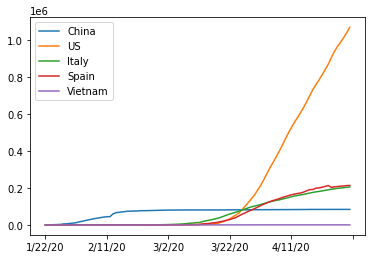

In [75]:
# I'm going to compare the number of cases in 5 different countries by visualization (China, US, Italy, Spain and Vietnam *-*)
covid_dataset.loc["China"].plot()
covid_dataset.loc["US"].plot()
covid_dataset.loc["Italy"].plot()
covid_dataset.loc["Spain"].plot()
covid_dataset.loc["Vietnam"].plot()
plt.legend()

### FIND MEASURE FOR SPREAD OF VIRUS

* IDEA: I FIND THE FIRST DERIVATIVE OF FOR NUMBER OF CASES IN EACH COUNTRY ABOVE DAY BY DAY, THEN FIND THE MAXIMUM INFECTION RATE 

In [76]:
countries=list(covid_dataset.index)
countries[:5]

['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola']

In [77]:
max_infection_rate=[]

In [78]:
for c in countries:
    max_infection_rate.append(covid_dataset.loc[c].diff().max())    

In [79]:
data={"max_infection_rate":max_infection_rate}
infection_rate_data=pd.DataFrame(data,index=countries)
infection_rate_data

,max_infection_rate
Afghanistan,232.0
Albania,34.0
Algeria,199.0
Andorra,43.0
Angola,5.0
...,...
West Bank and Gaza,66.0
Western Sahara,4.0
Yemen,5.0
Zambia,9.0


In [80]:
# We add 1 more collumn of max_infection_rate to our dataset
covid_dataset["max infection rate"]=max_infection_rate
covid_dataset.head(10)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,max infection rate
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1176,1279,1351,1463,1531,1703,1828,1939,2171,232.0
Albania,0,0,0,0,0,0,0,0,0,0,...,634,663,678,712,726,736,750,766,773,34.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,2910,3007,3127,3256,3382,3517,3649,3848,4006,199.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,723,723,731,738,738,743,743,743,745,43.0
Angola,0,0,0,0,0,0,0,0,0,0,...,25,25,25,25,26,27,27,27,27,5.0
Antigua and Barbuda,0,0,0,0,0,0,0,0,0,0,...,24,24,24,24,24,24,24,24,24,6.0
Argentina,0,0,0,0,0,0,0,0,0,0,...,3144,3435,3607,3780,3892,4003,4127,4285,4428,291.0
Armenia,0,0,0,0,0,0,0,0,0,0,...,1473,1523,1596,1677,1746,1808,1867,1932,2066,134.0
Australia,0,0,0,0,4,5,5,6,9,9,...,6652,6662,6677,6694,6714,6721,6744,6752,6766,497.0


## DATASET: WORLD HAPPINESS

---

In [83]:
happiness_dataset= pd.read_csv("C:/Users/Win 10/Downloads/worldwide_happiness_report.csv")
happiness_dataset.head(10)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
5,6,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343
6,7,Sweden,7.343,1.387,1.487,1.009,0.574,0.267,0.373
7,8,New Zealand,7.307,1.303,1.557,1.026,0.585,0.330,0.380
8,9,Canada,7.278,1.365,1.505,1.039,0.584,0.285,0.308
9,10,Austria,7.246,1.376,1.475,1.016,0.532,0.244,0.226


In [84]:
happiness_dataset.drop(["Overall rank","Score","Generosity","Perceptions of corruption"],axis=1,inplace=True)

In [86]:
happiness_dataset.set_index("Country or region",inplace=True)
happiness_dataset.head(10)

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557
Switzerland,1.452,1.526,1.052,0.572
Sweden,1.387,1.487,1.009,0.574
New Zealand,1.303,1.557,1.026,0.585
Canada,1.365,1.505,1.039,0.584


In [96]:
# I want to joint 2 dataset (covid_dataset and happiness_dataset together by inner joining)
data= covid_dataset.join(happiness_dataset,how="inner")
data=data[["GDP per capita","Social support","Healthy life expectancy","Freedom to make life choices","max infection rate"]]

In [97]:
data.head(10)

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,max infection rate
Afghanistan,0.350,0.517,0.361,0.000,232.0
Albania,0.947,0.848,0.874,0.383,34.0
Algeria,1.002,1.160,0.785,0.086,199.0
Argentina,1.092,1.432,0.881,0.471,291.0
Armenia,0.850,1.055,0.815,0.283,134.0
Australia,1.372,1.548,1.036,0.557,497.0
Austria,1.376,1.475,1.016,0.532,1321.0
Azerbaijan,1.043,1.147,0.769,0.351,105.0
Bahrain,1.362,1.368,0.871,0.536,301.0
Bangladesh,0.562,0.928,0.723,0.527,641.0


In [98]:
# CORRELATION MATRIX
data.corr()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,max infection rate
GDP per capita,1.000000,0.759468,0.863062,0.394603,0.250118
Social support,0.759468,1.000000,0.765286,0.456246,0.191958
Healthy life expectancy,0.863062,0.765286,1.000000,0.427892,0.289263
Freedom to make life choices,0.394603,0.456246,0.427892,1.000000,0.078196
max infection rate,0.250118,0.191958,0.289263,0.078196,1.000000


## VISUALIZATION

#### MAX INFECTION RATE + GDP PER CAPITA

D:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='max infection rate', ylabel='GDP per capita'>

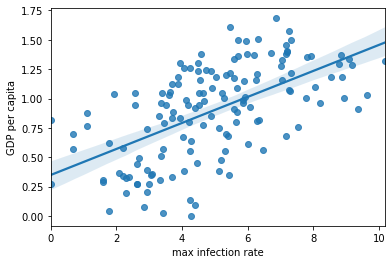

In [100]:
sns.regplot(np.log(data["max infection rate"]),data["GDP per capita"])

#### MAX INFECTION RATE + SOCIAL SUPPOT

D:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='max infection rate', ylabel='Social support'>

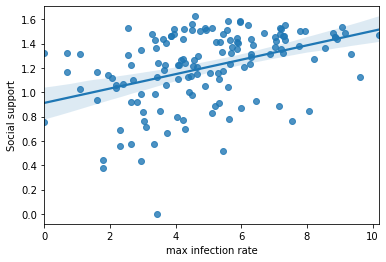

In [101]:
sns.regplot(np.log(data["max infection rate"]),data["Social support"])

#### MAX INFECTION RATE+ HEALTHY LIFE EXPECTANCY

D:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='max infection rate', ylabel='Healthy life expectancy'>

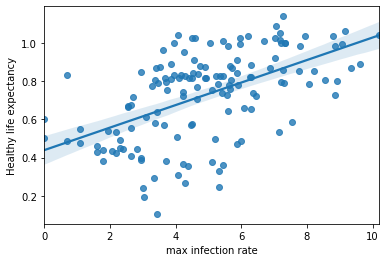

In [102]:
sns.regplot(np.log(data["max infection rate"]),data["Healthy life expectancy"])

#### MAX INFECTION RATE+ FREEDOM

D:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='max infection rate', ylabel='Freedom to make life choices'>

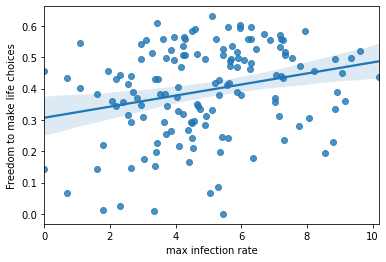

In [103]:
sns.regplot(np.log(data["max infection rate"]),data["Freedom to make life choices"])